# Майнор "Интеллектуальный анализ данных"
# Курс "Современные методы машинного обучения"
# Лабораторная работа №2. Распознование одежды.

В данной лабораторной работе вам предлагается обучить модель на основе нейронной сети для распознавания типов одежды и сравнить ее с "классическими" моделями.

## Данные

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
!ls

drive  sample_data


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/Alab2/"

Lab2_v2.html	t10k-images-idx3-ubyte.gz   train-labels-idx1-ubyte.gz
Lab2_v2.ipynb	t10k-labels-idx1-ubyte.gz
labels_map.csv	train-images-idx3-ubyte.gz


In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
X_train, y_train = load_mnist('/content/drive/My Drive/Colab Notebooks/Alab2/', kind='train')
X_test, y_test = load_mnist('/content/drive/My Drive/Colab Notebooks/Alab2/', kind='t10k')

In [0]:
print('X_train shape:', X_train.shape, 'y_train shape:', y_train.shape, 'type', type(X_train))
print('X_test shape:', X_test.shape, 'y_test shape', y_test.shape, 'type', type(X_test))

X_train shape: (60000, 784) y_train shape: (60000,) type <class 'numpy.ndarray'>
X_test shape: (10000, 784) y_test shape (10000,) type <class 'numpy.ndarray'>


Каждая строка в `X_train`, `X_test` - векторизованное монохромное изображение размерности  28×28  
Каждая строка в `y_train`, `y_test` - метка класса для соответсвующей строчки из `X_train`, `X_test`


In [0]:
labels_map  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Alab2/labels_map.csv', index_col='Label')

Для каждого объекта из обучающей и тестовой выборки назначен один из следующих классов:

In [0]:
labels_map

Description
Label             
0      T-shirt/top
1          Trouser
2         Pullover
3            Dress
4             Coat
5           Sandal
6            Shirt
7          Sneaker
8              Bag
9       Ankle boot

In [0]:
pic_id = 35
some_pic = X_train[pic_id]
pic_label = y_train[pic_id]

In [0]:
print('Letter class:', pic_label, '-', labels_map.loc[pic_label, 'Description'])

Letter class: 8 - Bag


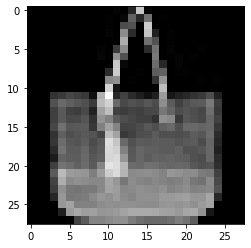

In [0]:
plt.imshow(some_pic.reshape((28, 28)), cmap='gray')
plt.show()

## Задания

Обучение неоходимо проводить на данных из `X_train`, качество модели проверять на данных из файла `X_test`.
Для моделирования желательно использовать библиотеки `keras` и `tensorflow`.  

Оценивать качество моделей нужно следующим образом:  
1. Построить кривую ROC  
2. Посчитать ROC AUC  
3. Построить кривую Precision - Recall  
4. Вывести `classification_report` из `sklearn.metrics`  
5. Посчитать confussion matrix  

### Задание 1

Обучите классический алгоритм машинного обучения для этих данных (например, SVM, Random Forest или Gradient Boosting Trees), используя интенсивности пикселей в качестве входного вектора для классификации. Оцените ошибку.  
**(max 3 балла)**

Делаем predict_proba и predict cразу. Метки нужны для матрицы, а графики по вероятностям для точности

In [0]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_recall_curve

In [0]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predicted_rf_proba = rf.predict_proba(X_test)
predicted_rf = rf.predict(X_test)
print(predicted_rf_proba)
print('\n')
print(predicted_rf)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[0.  0.  0.  ... 0.  0.  1. ]
 [0.  0.  0.9 ... 0.  0.  0. ]
 [0.  1.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  1.  0. ]
 [0.  1.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.4 0.2 0. ]]


[9 2 1 ... 8 1 5]


In [0]:
def labellize(x):
  return labels_map.values[x]

def plot_confusion_matrix(y_pred):
    y_p = np.array(labellize(y_pred)).reshape(10000,)
    y_t = np.array(labellize(y_test)).reshape(10000,)
    labels = labels_map.values.flatten()
    labels_name = labels_map.get('Description')
    cm = confusion_matrix(y_true=y_t, y_pred=y_p, labels=labels)
  
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(labels_name))
    plt.xticks(tick_marks, labels_name, rotation=45)
    plt.yticks(tick_marks, labels_name)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

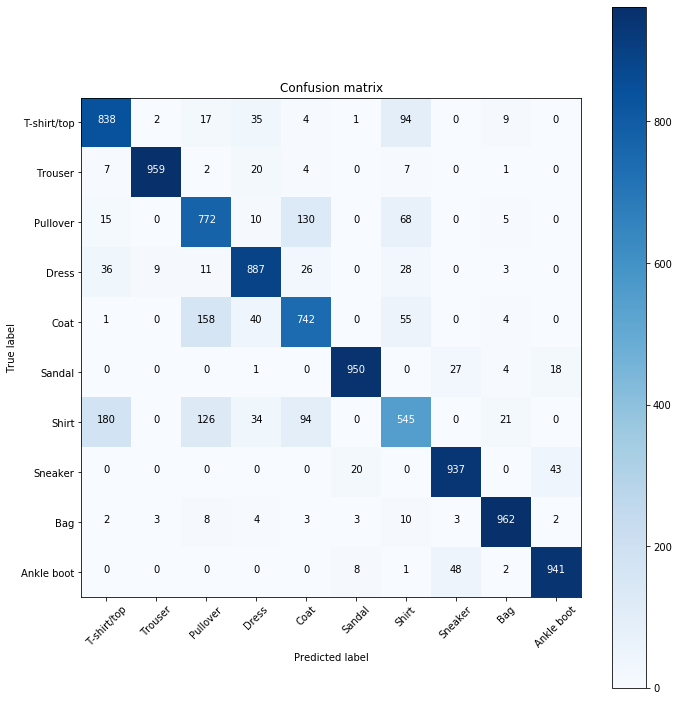

In [0]:
plot_confusion_matrix(predicted_rf)

In [0]:
def class_report(pred):
  print(classification_report(y_test, pred, target_names=labels_map.values.flatten()))

In [0]:
class_report(predicted_rf)

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.85      0.81      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.72      0.78      0.75      1000
       Dress       0.86      0.89      0.87      1000
        Coat       0.74      0.76      0.75      1000
      Sandal       0.95      0.95      0.95      1000
       Shirt       0.66      0.51      0.57      1000
     Sneaker       0.92      0.93      0.92      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [0]:
def roc_plot(y_pred):
    plt.figure(figsize=(15,10))
    bin_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
    for i in range(10):
        fpr, tpr, _ = roc_curve(bin_test[:, i], y_pred if y_pred.shape == (10000,) else y_pred[:, i])
        plt.plot(fpr, tpr, label='ROC class {} (AUC = %0.2f)'.format(i) % auc(fpr, tpr))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.legend(loc="lower right")
    plt.show()

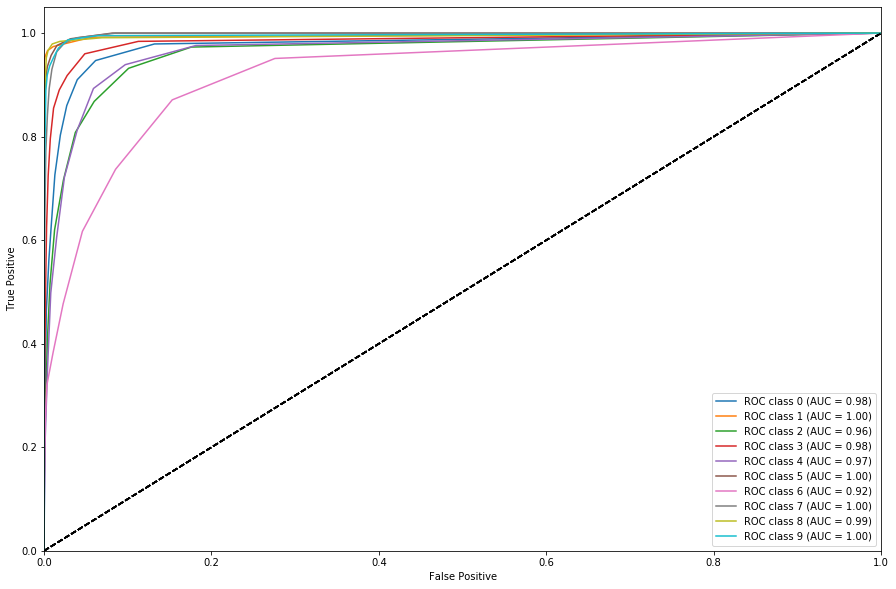

In [0]:
roc_plot(predicted_rf_proba)

In [0]:
def precision_recall_plot(y_pred): 
    bin_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
    plt.figure(figsize=(15,10))
    it = [[0,1],[2,3],[4,5],[6,7],[8,9]]
    for j in range(2):
        for k in range(5):
            precision, recall, _ = precision_recall_curve(bin_test[:, it[k][j]], y_pred[:, it[k][j]])
            plt.plot(recall, precision, label='class {}'.format(it[k][j]))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
 
    plt.show()

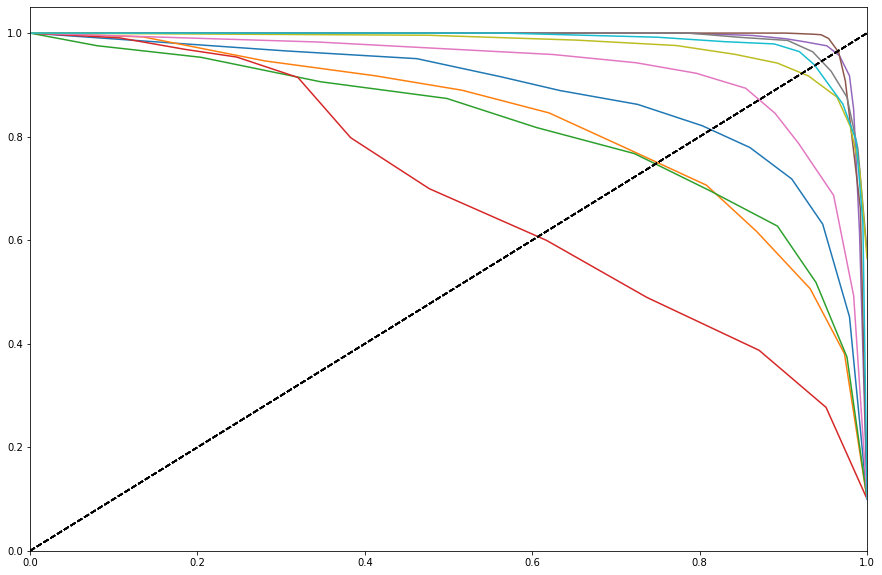

In [0]:
precision_recall_plot(predicted_rf_proba)

### Задание 2

1. Построить и обучить модели с 2-мя и 3-мя полносвязными (dense) скрытыми слоями.
2. Попробовать разные параметры нейронной сети - число нейронов на каждом слое, learning rate, batch size, функции активации, регуляризации и т.д. 
3. Оценить качество моделей с различными параметрами, выбрать наилучшую из рассмотренных моделей.

В начале можетбыть полезно ознакомиться с [руководством по созданию последовательных моделей в Keras](https://keras.io/getting-started/sequential-model-guide).  
А так же с [функциональным API keras](https://keras.io/getting-started/functional-api-guide). 
Создание последовательных моделей немного проще, в то время как функциональное API предоставляет больше гибкости. Для целей лабораторной работы подойдет любое.  
**(max 4 балла)**

In [0]:
!pip install tensorflow-gpu==2.0.0

In [0]:
from tensorflow import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import utils

двухслойная сетка. Пихаем что-то рандомное, мы же понятия не имеем, что будет в итоге. 500 неронов на вход, 784 на выход, но оно обосновано количеством пикселей. Активаторы relu & Softmax. а еще мы заменим пример ategorical_crossentropy из документации на на sparse_categorical_crossentropy, потому что у нас все классы взаимоисключающие

In [0]:
model1 = Sequential()
model1.add(Dense(500, input_dim = 784, activation="relu"))
model1.add(Dense(500, input_dim = 784, activation="relu"))
model1.add(Dense(10, activation="softmax"))

Оптимайзер будет adam. Эмпирически подсчитано было, что он самый быстрый. пусть будет он пока что. потом посмотрим

---



In [0]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [0]:
model1.fit(X_train,y_train,epochs=10, batch_size=100)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/sample - loss: 4.2146 - accuracy: 0.7686
Epoch 2/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5774 - accuracy: 0.8189
Epoch 3/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.4948 - accuracy: 0.8333
Epoch 4/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.4499 - accuracy: 0.8421
Epoch 5/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4447 - accuracy: 0.8448
Epoch 6/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4216 - accuracy: 0.8518
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4001 - accuracy: 0.8565
Epoch 8/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3941 - accuracy: 0.8589
Epoch 9/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3684 - accuracy: 0.8674
Epoch 10/10
60

In [0]:
mod1_loss, mod1_accur =model1.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
print("Accuracy: {}".format(mod1_accur))
print("Loss: {}".format(mod1_loss))

Accuracy: 0.854200005531311
Loss: 0.41535382716655733


для первого раза очень даже неплохо


попробуем поменять оптимайзер в модели 2. я до этого со всеми воcпроизводил, этот оказался самым точным. мне кажется, нет смысла абсолютно каждый еще сюда вставлять разные оптимайзеры


In [0]:
model2 = Sequential()
model2.add(Dense(500, input_dim = 784, activation="relu"))
model2.add(Dense(500, input_dim = 784, activation="relu"))
model2.add(Dense(10, activation="softmax"))

In [0]:
# тут адамакс как самый точный 
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adamax',metrics=["accuracy"])

In [0]:
model2.fit(X_train,y_train,epochs=10, batch_size=100)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/sample - loss: 5.3022 - accuracy: 0.7721
Epoch 2/10
60000/60000 [==============================] - 1s 25us/sample - loss: 1.1795 - accuracy: 0.8146
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.8071 - accuracy: 0.8284
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.5966 - accuracy: 0.8433
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4975 - accuracy: 0.8533
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4534 - accuracy: 0.8594
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3988 - accuracy: 0.8695
Epoch 8/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3683 - accuracy: 0.8775
Epoch 9/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3443 - accuracy: 0.8836
Epoch 10/10
60

In [0]:
mod2_loss, mod2_accur =model2.evaluate(X_test, y_test)
print("Accuracy: {}".format(mod2_accur))
print("Loss: {}".format(mod2_loss))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

с adamax как-то повеселее метрики вышли


В 3 модели вместо softmax запилим sigmoid. ну и оптимайзер, просто чтобы "поиграться". Заодно уменьшим количество нейронов во 2 скрытом слое

In [0]:
model3 = Sequential()
model3.add(Dense(500, input_dim = 784, activation="relu"))
model3.add(Dense(400, input_dim = 784, activation="relu"))
model3.add(Dense(10, activation="sigmoid"))

In [0]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer='Adagrad',metrics=["accuracy"])

In [0]:
model3.fit(X_train,y_train,epochs=10, batch_size=100)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/sample - loss: 3.2971 - accuracy: 0.1003
Epoch 2/10
60000/60000 [==============================] - 1s 24us/sample - loss: 1.6435 - accuracy: 0.1016
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 1.5055 - accuracy: 0.1623
Epoch 4/10
60000/60000 [==============================] - 1s 25us/sample - loss: 1.3690 - accuracy: 0.2546
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 1.3132 - accuracy: 0.2970
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 1.2670 - accuracy: 0.4070
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 1.2301 - accuracy: 0.4296
Epoch 8/10
60000/60000 [==============================] - 1s 24us/sample - loss: 1.1765 - accuracy: 0.4577
Epoch 9/10
60000/60000 [==============================] - 1s 24us/sample - loss: 1.1366 - accuracy: 0.4790
Epoch 10/10
60

In [0]:
mod3_loss, mod3_accur =model3.evaluate(X_test, y_test)
print("Accuracy: {}".format(mod3_accur))
print("Loss: {}".format(mod3_loss))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Тут совсем как-то грустно. 

в 4 модели вернемся к адаму чисто для выйгрыша в скорости работы, но в этот раз будем использовать линейную функцию активации 

In [0]:
model4 = Sequential()
model4.add(Dense(500, input_dim = 784, activation="linear"))
model4.add(Dense(500, input_dim = 784, activation="linear"))
model4.add(Dense(10, activation="softmax"))

In [0]:
model4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [0]:
model4.fit(X_train,y_train,epochs=10, batch_size=100)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/sample - loss: 29.8358 - accuracy: 0.7466
Epoch 2/10
60000/60000 [==============================] - 1s 25us/sample - loss: 9.2098 - accuracy: 0.7572
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 6.5864 - accuracy: 0.7617
Epoch 4/10
60000/60000 [==============================] - 1s 25us/sample - loss: 4.1233 - accuracy: 0.7706
Epoch 5/10
60000/60000 [==============================] - 1s 25us/sample - loss: 2.7092 - accuracy: 0.7753
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 1.9647 - accuracy: 0.7799
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 1.7228 - accuracy: 0.7808
Epoch 8/10
60000/60000 [==============================] - 1s 24us/sample - loss: 1.6501 - accuracy: 0.7800
Epoch 9/10
60000/60000 [==============================] - 1s 24us/sample - loss: 1.9330 - accuracy: 0.7731
Epoch 10/10
6

In [0]:
mod4_loss, mod4_accur =model4.evaluate(X_test, y_test)
print("Accuracy: {}".format(mod4_accur))
print("Loss: {}".format(mod4_loss))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

метрики стали хуже, значит и с оптимайзером adamax должно быть также.
Сейчас проверим на 5 модели. Bath_size увеличим

In [0]:
model5 = Sequential()
model5.add(Dense(500, input_dim = 784, activation="linear"))
model5.add(Dense(500, input_dim = 784, activation="linear"))
model5.add(Dense(10, activation="softmax"))

In [0]:
model5.compile(loss='sparse_categorical_crossentropy',optimizer='adamax',metrics=["accuracy"])

In [0]:
model5.fit(X_train,y_train,epochs=10, batch_size=200)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 17us/sample - loss: 31.1786 - accuracy: 0.7612
Epoch 2/10
60000/60000 [==============================] - 1s 13us/sample - loss: 6.7261 - accuracy: 0.7919
Epoch 3/10
60000/60000 [==============================] - 1s 13us/sample - loss: 5.1303 - accuracy: 0.7926
Epoch 4/10
60000/60000 [==============================] - 1s 13us/sample - loss: 4.4897 - accuracy: 0.7910
Epoch 5/10
60000/60000 [==============================] - 1s 13us/sample - loss: 4.0726 - accuracy: 0.7896
Epoch 6/10
60000/60000 [==============================] - 1s 13us/sample - loss: 4.2433 - accuracy: 0.7831
Epoch 7/10
60000/60000 [==============================] - 1s 13us/sample - loss: 4.2482 - accuracy: 0.7817
Epoch 8/10
60000/60000 [==============================] - 1s 13us/sample - loss: 4.0957 - accuracy: 0.7803
Epoch 9/10
60000/60000 [==============================] - 1s 13us/sample - loss: 3.9436 - accuracy: 0.7782
Epoch 10/10
6

In [0]:
mod5_loss, mod5_accur =model5.evaluate(X_test, y_test)
print("Accuracy: {}".format(mod5_accur))
print("Loss: {}".format(mod5_loss))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

ну, bath_size немного все подпортил, не считая даже adamax. а что если softmax на sigmoid поменять?

In [0]:
model6 = Sequential()
model6.add(Dense(200, input_dim = 784, activation="linear"))
model6.add(Dense(200, input_dim = 784, activation="linear"))
model6.add(Dense(12, activation="sigmoid"))

In [0]:
model6.compile(loss='sparse_categorical_crossentropy',optimizer='RMSprop',metrics=["accuracy"])

In [0]:
model6.fit(X_train,y_train,epochs=10, batch_size=100)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/sample - loss: 8.0139 - accuracy: 0.2255
Epoch 2/10
60000/60000 [==============================] - 1s 24us/sample - loss: 8.2603 - accuracy: 0.3012
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 5.2076 - accuracy: 0.2591
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 3.8970 - accuracy: 0.2346
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 2.9496 - accuracy: 0.2510
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 2.4351 - accuracy: 0.1631
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 2.3413 - accuracy: 0.1825
Epoch 8/10
60000/60000 [==============================] - 1s 24us/sample - loss: 2.3689 - accuracy: 0.1815
Epoch 9/10
60000/60000 [==============================] - 1s 24us/sample - loss: 2.3941 - accuracy: 0.1884
Epoch 10/10
60

In [0]:
mod6_loss, mod6_accur =model6.evaluate(X_test, y_test)
print("Accuracy: {}".format(mod6_accur))
print("Loss: {}".format(mod6_loss))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Идея оказалась дурацкой. Точность никакая

Так, резко вспоминаем, что нам нужно еще поменять несколько параметров, как это было сказано в подпункте 2 задания 2. поэтому умножим все на 2. плюс количество входящих нейронов будет 2000. Оптимайзер adadelta, потому что его до этого не использовали. пусть будет. За это время можно немножко отдохнуть и придумать план дальнейших действий

In [0]:
model7 = Sequential()
model7.add(Dense(2000, input_dim = 784, activation="relu"))
model7.add(Dense(2000, input_dim = 784, activation="relu"))
model7.add(Dense(20, activation="softmax"))

In [0]:
model7.compile(loss='sparse_categorical_crossentropy',optimizer='Adadelta',metrics=["accuracy"])

In [0]:
model7.fit(X_train,y_train,epochs=50, batch_size=200)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/sample - loss: 19.3013 - accuracy: 0.4180
Epoch 2/50
60000/60000 [==============================] - 1s 22us/sample - loss: 6.1409 - accuracy: 0.6813
Epoch 3/50
60000/60000 [==============================] - 1s 22us/sample - loss: 4.6505 - accuracy: 0.7341
Epoch 4/50
60000/60000 [==============================] - 1s 22us/sample - loss: 3.9405 - accuracy: 0.7615
Epoch 5/50
60000/60000 [==============================] - 1s 22us/sample - loss: 3.4956 - accuracy: 0.7781
Epoch 6/50
60000/60000 [==============================] - 1s 22us/sample - loss: 3.1736 - accuracy: 0.7881
Epoch 7/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.9274 - accuracy: 0.7976
Epoch 8/50
60000/60000 [==============================] - 1s 23us/sample - loss: 2.7217 - accuracy: 0.8042
Epoch 9/50
60000/60000 [==============================] - 1s 22us/sample - loss: 2.5500 - accuracy: 0.8098
Epoch 10/50
6

In [0]:
mod7_loss, mod7_accur =model7.evaluate(X_test, y_test)
print("Accuracy: {}".format(mod7_accur))
print("Loss: {}".format(mod7_loss))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Потери большие, а accuracy не такая уж и высокая, чтобы тратить на это столько времени. все же лучше подобрать адекватные параметры, а не в тупую задирать цифры. Я имею ввиду, что если просто написать огромные цифры без понимания, то результат не будет идеальным


Итак, у меня получилась двухслойная модель такая

In [0]:
model21 = Sequential()
model21.add(Dense(512, input_dim = 784, activation="relu"))
model21.add(Dense(512, input_dim = 784, activation="relu"))
model21.add(Dense(10, activation="softmax"))
model21.compile(loss='sparse_categorical_crossentropy',optimizer='adamax',metrics=["accuracy"])
model21.fit(X_train,y_train,epochs=40, batch_size=16)
mod21_loss, mod21_accur =model21.evaluate(X_test, y_test)
print('\n')
print("Accuracy: {}".format(mod21_accur))
print("Loss: {}".format(mod21_loss))

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 8s 139us/sample - loss: 2.6848 - accuracy: 0.7641
Epoch 2/40
60000/60000 [==============================] - 8s 134us/sample - loss: 0.5880 - accuracy: 0.8161
Epoch 3/40
60000/60000 [==============================] - 8s 135us/sample - loss: 0.4570 - accuracy: 0.8438
Epoch 4/40
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3964 - accuracy: 0.8611
Epoch 5/40
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3618 - accuracy: 0.8718
Epoch 6/40
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3321 - accuracy: 0.8788
Epoch 7/40
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3127 - accuracy: 0.8844
Epoch 8/40
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2948 - accuracy: 0.8920
Epoch 9/40
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2790 - accuracy: 0.8974
Epoch

Итак, в итоге, самой удачной моедлью оказалась вторая.Как бы я не старался, на 2 слоях не удалось добить сильно выше 90%, ибо если увеличить количество эпох, то в какой-то момент значения практически перестанут  меняться, огромное количество нейронов тоже не спасает, как и различное количество batch_size

Покажем графики 2слойной сетки

In [0]:
model21_proba = model21.predict_proba(X_test)
model21_class = model21.predict_classes(X_test)

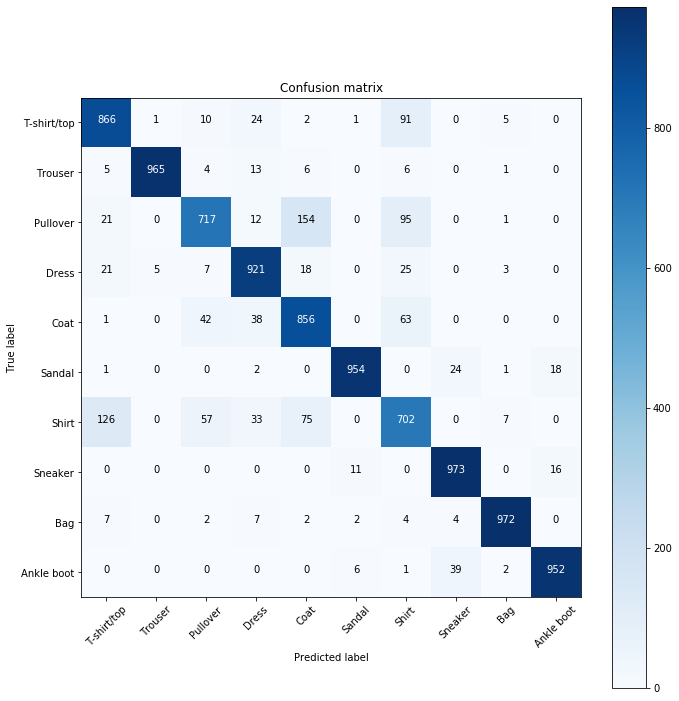

In [0]:
plot_confusion_matrix(model21_class)

Тут явно видно, что модель получилась поприличнее, чем простой алгоритм из 1 части

In [0]:
class_report(model21_class)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.85      0.72      0.78      1000
       Dress       0.88      0.92      0.90      1000
        Coat       0.77      0.86      0.81      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.71      0.70      0.71      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



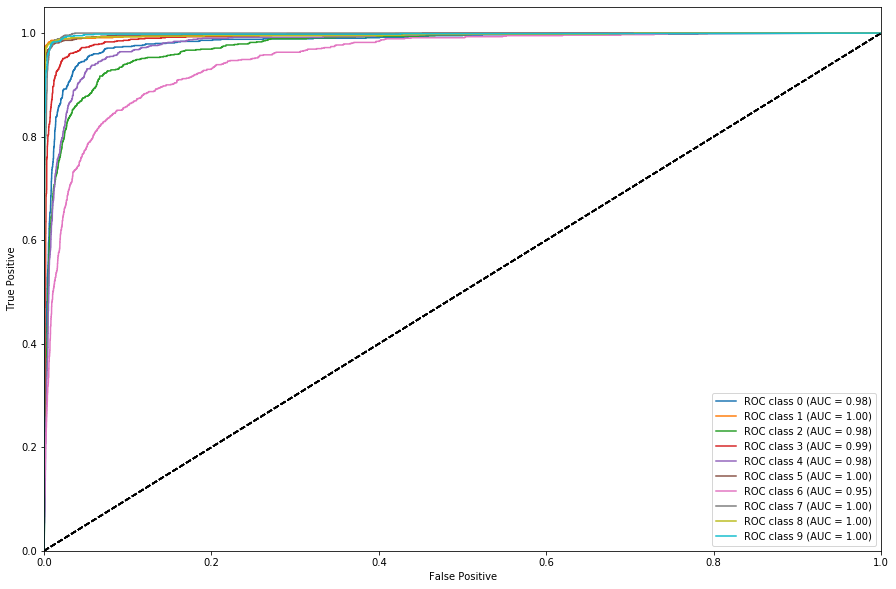

In [0]:
roc_plot(model21_proba)

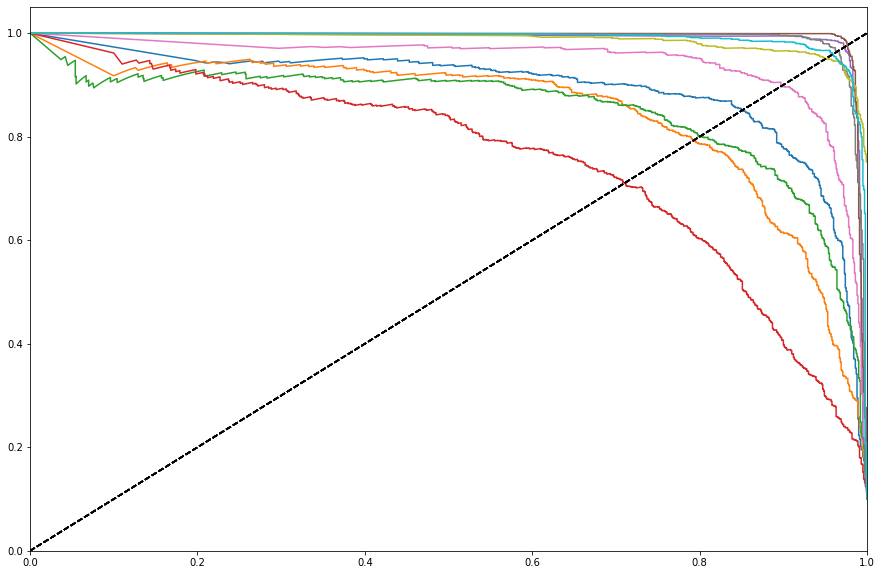

In [0]:
precision_recall_plot(model21_proba)

Построим нейросеть уже с 3 слоями. Тут уже так много поиграть не получится, поскольку основные принципы уловили еще на 2 слоях. Да и учится она заметно дольше по времени 

In [0]:
model32 = Sequential()
model32.add(Dense(300, input_dim = 784, activation="relu"))
model32.add(Dense(300, input_dim = 784, activation="relu"))
model32.add(Dense(300, activation="relu"))
model32.add(Dense(10, activation="softmax"))
model32.compile(loss='sparse_categorical_crossentropy',optimizer='adamax',metrics=["accuracy"])
model32.fit(X_train,y_train,epochs=20, batch_size=100)
mod32_loss, mod32_accur =model32.evaluate(X_test, y_test)
print('\n')
print("Accuracy: {}".format(mod32_accur))
print("Loss: {}".format(mod32_loss))

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 30us/sample - loss: 2.5668 - accuracy: 0.7608
Epoch 2/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.7535 - accuracy: 0.8135
Epoch 3/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.5844 - accuracy: 0.8313
Epoch 4/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4955 - accuracy: 0.8431
Epoch 5/20
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4409 - accuracy: 0.8528
Epoch 6/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4075 - accuracy: 0.8599
Epoch 7/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3655 - accuracy: 0.8702
Epoch 8/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3454 - accuracy: 0.8761
Epoch 9/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3211 - accuracy: 0.8847
Epoch 10/20
60

Итак, даже простой пример трехслойной сетки показал себя неплохо. почти также, как и моя лучшая двухслойная модель

In [0]:
model33 = Sequential()
model33.add(Dense(300, input_dim = 784, activation="relu"))
model33.add(Dense(200, activation="sigmoid"))
model33.add(Dense(200, activation="sigmoid"))
model33.add(Dense(20, activation="sigmoid"))
model33.compile(loss='sparse_categorical_crossentropy',optimizer='RMSprop',metrics=["accuracy"])
model33.fit(X_train,y_train,epochs=20, batch_size=100)
mod33_loss, mod33_accur =model33.evaluate(X_test, y_test)
print('\n')
print("Accuracy: {}".format(mod33_accur))
print("Loss: {}".format(mod33_loss))

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.8772 - accuracy: 0.6797
Epoch 2/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.6347 - accuracy: 0.7559
Epoch 3/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.6376 - accuracy: 0.7579
Epoch 4/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.6274 - accuracy: 0.7623
Epoch 5/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.6056 - accuracy: 0.7728
Epoch 6/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.5946 - accuracy: 0.7809
Epoch 7/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5770 - accuracy: 0.7875
Epoch 8/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.5798 - accuracy: 0.7859
Epoch 9/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5808 - accuracy: 0.7838
Epoch 10/20
60




Попробуем теперь взять ту же модель, что и 32, но только уменьшим количество нейронов во 2 слое

In [0]:
model34 = Sequential()
model34.add(Dense(300, input_dim = 784, activation="relu"))
model34.add(Dense(150, activation="relu"))
model34.add(Dense(10, activation="softmax"))
model34.compile(loss='sparse_categorical_crossentropy',optimizer='adamax',metrics=["accuracy"])
model34.fit(X_train,y_train,epochs=20, batch_size=100)
mod34_loss, mod34_accur =model34.evaluate(X_test, y_test)
print('\n')
print("Accuracy: {}".format(mod34_accur))
print("Loss: {}".format(mod34_loss))

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/sample - loss: 5.3216 - accuracy: 0.7587
Epoch 2/20
60000/60000 [==============================] - 1s 22us/sample - loss: 1.7100 - accuracy: 0.8062
Epoch 3/20
60000/60000 [==============================] - 1s 22us/sample - loss: 1.1407 - accuracy: 0.8235
Epoch 4/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.7964 - accuracy: 0.8320
Epoch 5/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.6004 - accuracy: 0.8429
Epoch 6/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.4852 - accuracy: 0.8557
Epoch 7/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.4186 - accuracy: 0.8655
Epoch 8/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3832 - accuracy: 0.8725
Epoch 9/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3490 - accuracy: 0.8790
Epoch 10/20
60

Метрика Accuracy увеличилась. Немного, но увеличилась. Потерь тоже стало меньше

Прогоним трехслойную сетку с теми же параметрами, что и двухслойную. к счастью, метрики получились довольно качественные. Лучшие из тех, что мне удалось достичь
Разница, что с одинаковым количеством нейронов, что с уменьшением на 2 слое в данном случае минимальна, поэтому не будем уменьшать их для чистоты эксперимента

In [0]:
model31 = Sequential()
model31.add(Dense(512, input_dim = 784, activation="relu"))
model31.add(Dense(512, activation="relu",))
model31.add(Dense(512, activation="relu",))
model31.add(Dense(10, activation="softmax"))
model31.compile(loss='sparse_categorical_crossentropy',optimizer='adamax',metrics=["accuracy"])
model31.fit(X_train,y_train,epochs=40, batch_size=16)
mod31_loss, mod31_accur =model31.evaluate(X_test, y_test)
print('\n')
print("Accuracy: {}".format(mod31_accur))
print("Loss: {}".format(mod31_loss))

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 9s 147us/sample - loss: 1.5758 - accuracy: 0.7714
Epoch 2/40
60000/60000 [==============================] - 9s 142us/sample - loss: 0.4792 - accuracy: 0.8344
Epoch 3/40
60000/60000 [==============================] - 9s 142us/sample - loss: 0.3904 - accuracy: 0.8592
Epoch 4/40
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3465 - accuracy: 0.8741
Epoch 5/40
60000/60000 [==============================] - 9s 144us/sample - loss: 0.3217 - accuracy: 0.8821
Epoch 6/40
60000/60000 [==============================] - 9s 142us/sample - loss: 0.3044 - accuracy: 0.8880
Epoch 7/40
60000/60000 [==============================] - 9s 142us/sample - loss: 0.2860 - accuracy: 0.8931
Epoch 8/40
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2741 - accuracy: 0.8985
Epoch 9/40
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2610 - accuracy: 0.9027
Epoch

Преимущество у трех слоев перед двумя есть, но не какое-то заоблочное. Посмотрим, что же скажут графики

График для 3 слоев

In [0]:
model31_proba = model31.predict_proba(X_test)
model31_class = model31.predict_classes(X_test)

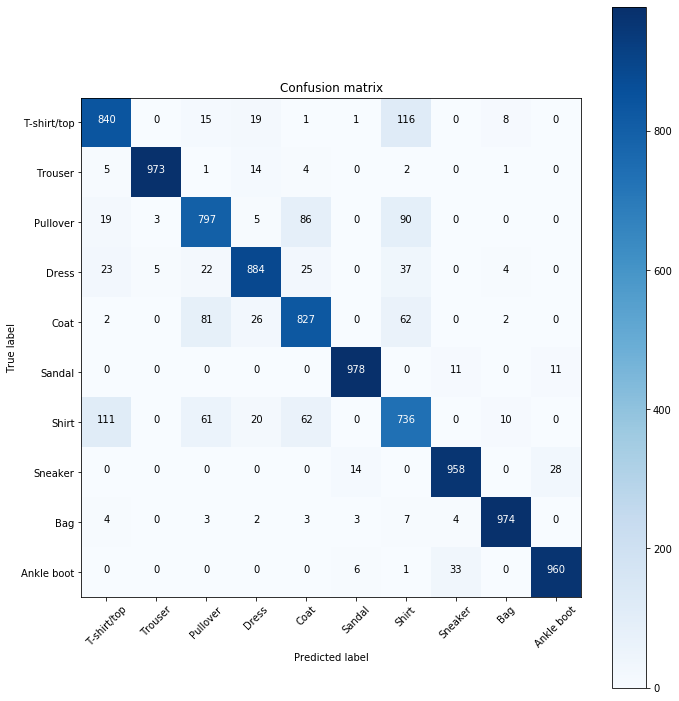

In [0]:
plot_confusion_matrix(model31_class)

In [0]:
class_report(model31_class)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.80      0.81      1000
       Dress       0.91      0.88      0.90      1000
        Coat       0.82      0.83      0.82      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.70      0.74      0.72      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



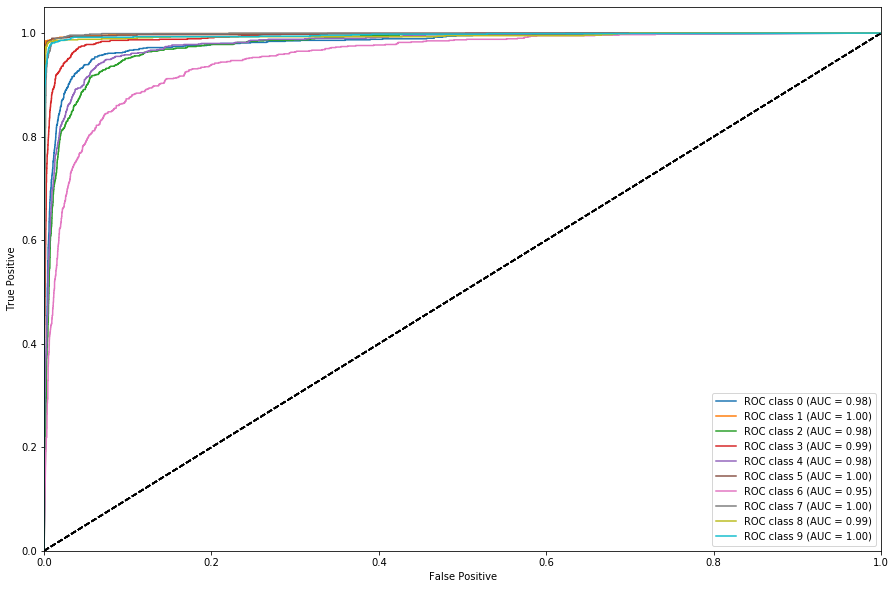

In [0]:
roc_plot(model31_proba)

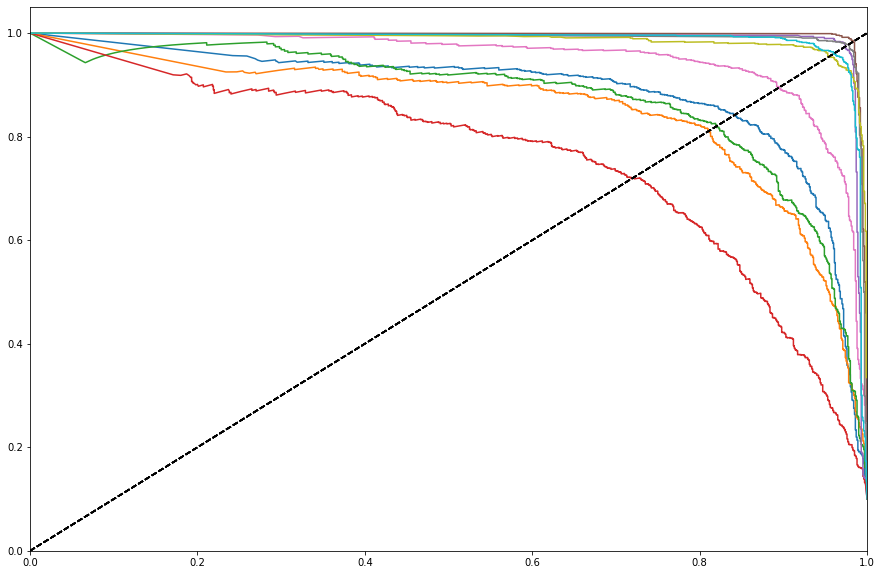

In [0]:
precision_recall_plot(model31_proba)

графики подтверждают наши результаты, все выглядит поаккуратнее, метрики интереснее. Но не слишком-то равномерно. Разберем это в 3 задании

### Задание 3

1. Найти 5 пар классов, которые чаще всего путаются между собой - объяснить с логической точки зрения почему. Привести примеры с картинками, которые были детектированы с ошибкой.
2. Насколько равномерно обучилась ваша модель, а именно все ли классы определяются с примерно одинаковой точностью? Приведите доказательства вашей точки зрения, а также классы с самым лучшим и с самым худшим процентом детекции (точностью детекции).  
**(max 2 балла)**

Shirt/T-shirt 

Shirt/Pullover

Shirt/Coat

Pullover/Coat

Dress/Shirt




Легко заметить, что самыми сложными классами для сетки являлись майки и футболки. По сути, они отличаются только длинной рукава. так что это вполне понятно

In [0]:

  labels = labels_map.get("Description")

### Задание 4

Попробовать другие возможные архитектуры: большее/меньшее количество слоёв, свёрточные слои, использование весов из предобученных моделей и т.д. На сколько получится улучшить результат?  
**(max 3 балла)**

Начнем с того, что сделаем модель с 5 слоями. просто все в кучу соберем

In [0]:
model51 = Sequential()
model51.add(Dense(512, input_dim = 784, activation="relu"))
model51.add(Dense(512, activation="relu",))
model51.add(Dense(512, activation="relu",))
model51.add(Dense(10, activation="tanh"))
model51.add(Dense(10, activation="sigmoid"))
model51.add(Dense(10, activation="softmax"))
model51.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
model51.fit(X_train,y_train,epochs=20, batch_size=100)
mod51_loss, mod51_accur =model51.evaluate(X_test, y_test)
print('\n')
print("Accuracy: {}".format(mod51_accur))
print("Loss: {}".format(mod51_loss))

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/sample - loss: 2.3052 - accuracy: 0.1016
Epoch 2/20
60000/60000 [==============================] - 2s 26us/sample - loss: 2.3032 - accuracy: 0.0988
Epoch 3/20
60000/60000 [==============================] - 2s 26us/sample - loss: 2.3031 - accuracy: 0.1001
Epoch 4/20
60000/60000 [==============================] - 2s 26us/sample - loss: 2.3031 - accuracy: 0.0995
Epoch 5/20
60000/60000 [==============================] - 2s 25us/sample - loss: 2.3031 - accuracy: 0.1007
Epoch 6/20
60000/60000 [==============================] - 2s 25us/sample - loss: 2.3030 - accuracy: 0.1015
Epoch 7/20
60000/60000 [==============================] - 2s 25us/sample - loss: 2.3030 - accuracy: 0.0980
Epoch 8/20
60000/60000 [==============================] - 2s 26us/sample - loss: 2.3030 - accuracy: 0.0998
Epoch 9/20
60000/60000 [==============================] - 2s 26us/sample - loss: 2.3030 - accuracy: 0.0988
Epoch 10/20
60

Идея не очень удачная(очень неудачная). сейчас посмотрим, к чему в принципе могу привести 5 слоев

In [0]:
model52 = Sequential()
model52.add(Dense(100, input_dim = 784, activation="relu"))
model52.add(Dense(100, activation="relu"))
model52.add(Dense(100, activation="relu"))
model52.add(Dense(100, activation="relu"))
model52.add(Dense(100, activation="relu"))
model52.add(Dense(10, activation="softmax"))
model52.compile(loss='sparse_categorical_crossentropy',optimizer='Adadelta',metrics=["accuracy"])
model52.fit(X_train,y_train,epochs=20, batch_size= 16)
mod52_loss, mod52_accur =model52.evaluate(X_test, y_test)
print('\n')
print("Accuracy: {}".format(mod52_accur))
print("Loss: {}".format(mod52_loss))

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 156us/sample - loss: 12.5563 - accuracy: 0.2580
Epoch 2/20
60000/60000 [==============================] - 9s 150us/sample - loss: 4.5158 - accuracy: 0.4731
Epoch 3/20
60000/60000 [==============================] - 9s 150us/sample - loss: 3.1973 - accuracy: 0.5613
Epoch 4/20
60000/60000 [==============================] - 9s 148us/sample - loss: 2.6054 - accuracy: 0.6028
Epoch 5/20
60000/60000 [==============================] - 9s 149us/sample - loss: 2.2419 - accuracy: 0.6298
Epoch 6/20
60000/60000 [==============================] - 9s 147us/sample - loss: 1.9958 - accuracy: 0.6489
Epoch 7/20
60000/60000 [==============================] - 9s 151us/sample - loss: 1.8173 - accuracy: 0.6628
Epoch 8/20
60000/60000 [==============================] - 9s 149us/sample - loss: 1.6787 - accuracy: 0.6740
Epoch 9/20
60000/60000 [==============================] - 9s 148us/sample - loss: 1.5674 - accuracy: 0.6816
Epoc

Весело, но все равно не то, что нам нужно

а теперь с 1 слоем

In [0]:
model01 = Sequential()
model01.add(Dense(100, input_dim = 784, activation="relu"))
model01.add(Dense(10, activation="softmax"))
model01.compile(loss='sparse_categorical_crossentropy',optimizer='Adadelta',metrics=["accuracy"])
model01.fit(X_train,y_train,epochs=20, batch_size= 16)
mod01_loss, mod01_accur =model01.evaluate(X_test, y_test)
print('\n')
print("Accuracy: {}".format(mod01_accur))
print("Loss: {}".format(mod01_loss))

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 131us/sample - loss: 79.9371 - accuracy: 0.2400
Epoch 2/20
60000/60000 [==============================] - 8s 125us/sample - loss: 30.5140 - accuracy: 0.4512
Epoch 3/20
60000/60000 [==============================] - 7s 124us/sample - loss: 22.6469 - accuracy: 0.5347
Epoch 4/20
60000/60000 [==============================] - 7s 124us/sample - loss: 18.9242 - accuracy: 0.5759
Epoch 5/20
60000/60000 [==============================] - 7s 125us/sample - loss: 16.7302 - accuracy: 0.6018
Epoch 6/20
60000/60000 [==============================] - 8s 125us/sample - loss: 15.2173 - accuracy: 0.6212
Epoch 7/20
60000/60000 [==============================] - 8s 126us/sample - loss: 14.0994 - accuracy: 0.6357
Epoch 8/20
60000/60000 [==============================] - 8s 125us/sample - loss: 13.2036 - accuracy: 0.6469
Epoch 9/20
60000/60000 [==============================] - 7s 125us/sample - loss: 12.4780 - accuracy: 0.6

в принципе... жизнеспособно, очень даже. быстренько так можно обучить даже на 1 слое

Попробуем сверточную

In [0]:
from tensorflow.keras.layers import Conv1D, Conv2D, Flatten, Reshape, MaxPooling2D, Dropout
from keras.utils import to_categorical

In [0]:
X_train, y_train = load_mnist('/content/drive/My Drive/Colab Notebooks/Alab2/', kind='train')
X_test, y_test = load_mnist('/content/drive/My Drive/Colab Notebooks/Alab2/', kind='t10k')

In [0]:
train_model = X_train.reshape(60000,28,28,1)
test_model = X_test.reshape(10000,28,28,1)

In [0]:
last_model= Sequential()

In [0]:
last_model.add(Conv2D(64, kernel_size=2, activation='relu', input_shape=(28,28,1)))
last_model.add(Conv2D(64, kernel_size=2, activation='relu', input_shape=(28,28,1)))
last_model.add(Flatten())
last_model.add(Dense(10, activation='softmax'))

приплетем мой любимый adamax

In [0]:
last_model.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [321]:
last_model.fit(train_model, y_train, batch_size=100, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1831 - accuracy: 0.9337
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1505 - accuracy: 0.9465
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1278 - accuracy: 0.9550
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1037 - accuracy: 0.9633
Epoch 5/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0850 - accuracy: 0.9703
